# Twitter sentiment analysis

In [1]:
import pandas as pd

COLUMNS  = ['target', 'id', 'date', 'flag', 'user', 'text']

# Reading data with appropriate encoding
data = pd.read_csv('data/twitter_data.csv', encoding='iso8859_2', names=COLUMNS)

In [2]:
# What the data looks like
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Types and shape

In [3]:
data.dtypes

target     int64
id         int64
date      object
flag      object
user      object
text      object
dtype: object

In [4]:
data.shape

(1600000, 6)

### Target value

0 means negative, 4 means positive. 

In [5]:
data['target'] = data['target'].map({0: 'negative', 4: 'positive'})

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data['target'], order=data['target'].value_counts().index)
plt.show()

<Figure size 640x480 with 1 Axes>

The variable is balanced. There are 800 000 positive tweets and 800 000 negative tweets. 

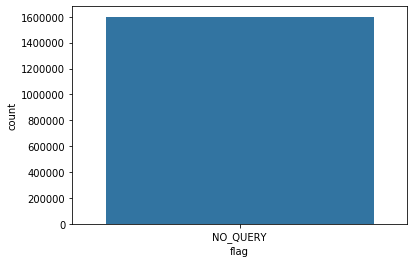

In [7]:
sns.countplot(data['flag'], order=data['flag'].value_counts().index)
plt.show()

In [8]:
data = data.drop(columns=['id', 'date', 'flag', 'user'])

In [9]:
# data = pd.concat([data[:10000], data[1589999:]])

In [10]:
data['text'][:10]

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
5                        @Kwesidei not the whole crew 
6                                          Need a hug 
7    @LOLTrish hey  long time no see! Yes.. Rains a...
8                 @Tatiana_K nope they didn't have it 
9                            @twittera que me muera ? 
Name: text, dtype: object

### Preprocessing

In [11]:
import re

pattern_nick = re.compile(r'@[^\s]+')
pattern_http = re.compile(r'http:\/\/[^ ]+')
pattern_www = re.compile(r'www\.[^ ]+')
pattern_number = re.compile(r'[0-9]+')
pattern_signs = re.compile(r'[%,.!?-]\'')
pattern_letters = re.compile(r'[^a-zA-Z]')

In [12]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 
from nltk.tag import pos_tag

TAG_TO_REMOVE = {'X', '.'}
ps = PorterStemmer()

In [13]:
from nltk.stem import PorterStemmer 

ps = PorterStemmer()

In [14]:
from nltk.corpus import stopwords

In [15]:
import time
t = time.time()

tweets = []


def preprocess(tweet):
    sentence = []   
    
    tweet = tweet.lower()
    tweet = re.sub(pattern_nick, 'nick', tweet)
    tweet = re.sub(pattern_http, 'www', tweet)
    tweet = re.sub(pattern_www, 'www', tweet)
    tweet = re.sub(pattern_number, '', tweet)
    tweet = re.sub(pattern_signs, '', tweet)
    tweet = nltk.word_tokenize(tweet)
    tweet = nltk.pos_tag(tweet, tagset='universal')
    for token in tweet:
        if token[1] not in TAG_TO_REMOVE:
            stem_word = ps.stem(token[0])
            sentence.append(stem_word)
    return ' '.join(sentence)
    
data['text'] = data['text'].apply(preprocess)
    
print(round(time.time()-t))

1254


In [16]:
data['text'][:10]

0    nick awww that 's a bummer you shoulda got dav...
1    is upset that he ca n't updat hi facebook by t...
2    nick i dive mani time for the ball manag to sa...
3         my whole bodi feel itchi and like it on fire
4    nick no it 's not behav at all i 'm mad whi am...
5                              nick not the whole crew
6                                           need a hug
7    nick hey long time no see .. rain a bit onli a...
8                       nick nope they did n't have it
9                                    nick que me muera
Name: text, dtype: object

time listy: 1415

### Negative words cloud

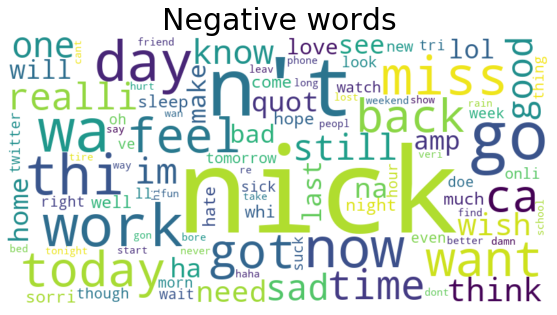

In [17]:
from wordcloud import WordCloud

negative_tweets = data['text'][:800000]
plt.figure(figsize=(15,5))
wordcloud = WordCloud(background_color="white", height=400, width=800, max_words = 100, 
                      collocations=False).generate(" ".join(negative_tweets))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Negative words', {'fontsize': 30})
plt.axis("off")
plt.show()

### Positive words cloud

In [18]:
# from wordcloud import WordCloud

# positive_tweets = data['text'][800000:]
# plt.figure(figsize=(15,5))
# wordcloud = WordCloud(background_color="white", height=400, width=800, max_words=100, 
#                       collocations=False).generate(" ".join(positive_tweets))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.title('Positive words', {'fontsize': 30})
# plt.show()

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size = 0.2, random_state = 42)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0,
                max_features=500000, min_df=1, ngram_range=(1, 2), norm='l2',
                preprocessor=None, smooth_idf=True, stop_words=None,
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [21]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

### Bernoulli Naive Bayes

In [22]:
from sklearn.naive_bayes import BernoulliNB

BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)

BernoulliNB(alpha=2, binarize=0.0, class_prior=None, fit_prior=True)

In [23]:
y_pred = BNBmodel.predict(X_test)

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.80      0.79      0.80    159494
    positive       0.79      0.81      0.80    160506

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



In [25]:
your_text = ['I hate Mondays', 'I like a good weather!']
preprocess_text = []

for sentence in your_text:
    preprocess_text.append(preprocess(sentence))
    

preprocess_text  = vectoriser.transform(preprocess_text)
BNBmodel.predict(preprocess_text)

array(['negative', 'positive'], dtype='<U8')

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
LogisticRegression = LogisticRegression(max_iter=500)
LogisticRegression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = LogisticRegression.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.83      0.81      0.82    159494
    positive       0.82      0.83      0.82    160506

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000

